<a href="https://colab.research.google.com/github/ganpath21/machine-learning-using-tensorflow/blob/master/Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

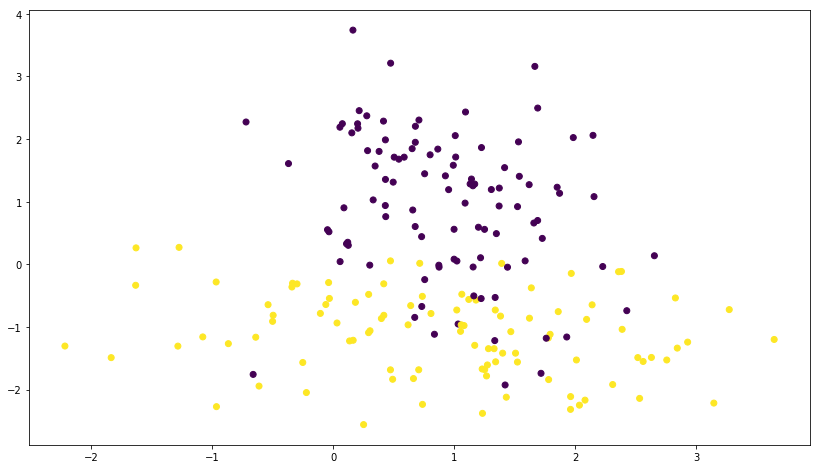

In [1]:
from sklearn import datasets as skds
import matplotlib.pyplot as plt
num_outputs = 2
num_inputs = 2
x, y = skds.make_classification(n_samples=200,
                                n_features=num_inputs,
                                n_informative=2,
                                n_redundant=0,
                                n_repeated=0,
                                n_classes=num_outputs,
                                n_clusters_per_class=1)
plt.figure(figsize=(14, 8))
plt.scatter(x[:, 0], x[:, 1], marker='o', c=y)
plt.show()

In [2]:
import numpy as np
#one-hot encoded targets
print(y[0:5])
y = np.eye(num_outputs)[y]
print(y[0:5])

[0 0 1 0 1]
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [0]:
#Divide the dataset into train and test categories:
from sklearn import model_selection as skms
x_train, x_test, y_train, y_test = skms.train_test_split(x, y, test_size=.4, random_state=42)

In [0]:
import tensorflow as tf
num_outputs = y_train.shape[1]
num_inputs = x_train.shape[1]

learning_rate = 0.001

# input images
x = tf.placeholder(dtype=tf.float32, shape=[None, num_inputs], name="x")
# output labels
y = tf.placeholder(dtype=tf.float32, shape=[None, num_outputs], name="y")

#model parameters
w = tf.Variable(tf.zeros([num_inputs, num_outputs]), name="w")
b = tf.Variable(tf.zeros([num_outputs]), name="b")
model = tf.nn.sigmoid(tf.matmul(x,w) + b)

loss = tf.reduce_mean(-tf.reduce_sum((y * tf.log(model)) + ((1 - y) * tf.log(1 - model)), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

epoch 0000 accuracy=0.89999998


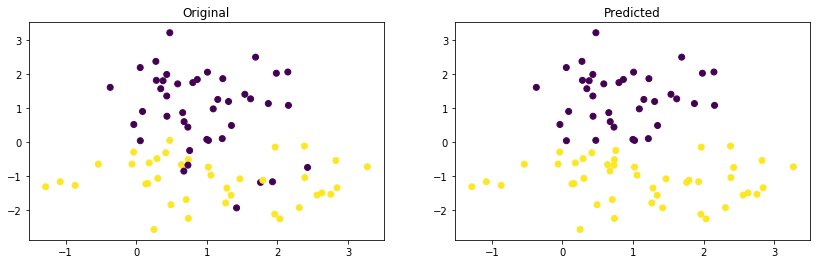

In [5]:
num_epochs = 1
with tf.Session() as tfs:
  tf.global_variables_initializer().run()
  for epoch in range(num_epochs):
    tfs.run(optimizer, feed_dict={x:x_train, y:y_train})
    y_pred = tfs.run(tf.arg_max(model, 1), feed_dict = {x : x_test})
    y_orig = tfs.run(tf.argmax(y, 1), feed_dict={y:y_test})

    preds_check = tf.equal(y_pred, y_orig)
    accuracy_op = tf.reduce_mean(tf.cast(preds_check, tf.float32))
    accuracy_score = tfs.run(accuracy_op)
    print("epoch {0:04d} accuracy={1:.8f}".format(epoch, accuracy_score))
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    plt.scatter(x_test[:,0], x_test[:, 1], marker='o',c=y_orig)
    plt.title('Original')
    plt.subplot(1,2,2)
    plt.scatter(x_test[:, 0], x_test[:,1], marker='o', c=y_pred)
    plt.title('Predicted')
    plt.show()